# <center>Diamond Quality Analysis</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
import pydotplus

In [2]:
dataset = pd.read_excel("Diamonds.xlsx")
dataset

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Cushion,5.57,J,Blue,Orange,Pinkish,Fancy Dark,VVS1,Poor,...,M,VTK,SL,Blue,Blue,Faint,GIA,684153,E1,2014-12-22
1,131704776,Cushion,0.42,K,Pink,Orange,Yellowish,Fancy Vivid,SI1,Excellent,...,VTN,VTK,N,White,Green,Slight,HRD,1276836,Yes,2020-12-01
2,131584417,Marquise,0.84,I,Black,Pink,Yellowish,Fancy Vivid,SI3,Fair,...,TN,STK,EL,Orange,White,Very Strong,HRD,1274951,No,2013-06-13
3,131584416,Pear,17.26,K,Pink,Purple,Orangey,Very Light,I2,Very Good,...,STN,TK,L,Green,Yellow,Very Strong,GIA,480725,Yes,2022-08-16
4,131613644,Princess,2.32,K,Orange,Purple,Yellowish,Fancy Light,VS2,Very Good,...,TK,VTK,N,White,Blue,Very Strong,IGI,1273331,No,2005-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Emerald,2.52,I,Chameleon,Blue,Purplish,Fancy Vivid,VS2,Fair,...,STN,M,M,Blue,Orange,Strong,HRD,1209165,No,2019-05-01
219700,135122237,Heart,1.36,K,Blue,Orange,Greenish,Fancy,IF,Fair,...,VTK,M,N,Green,Blue,Medium,IGI,357172,No,2007-10-11
219701,135553116,Asscher,3.69,D,Black,Blue,Brownish,Fancy Vivid,VS2,Fair,...,XTN,STK,VS,Yellow,Orange,Very Strong,HRD,1349494,E1,2014-04-04
219702,114752541,Emerald,6.45,I,Pink,Chameleon,Brownish,Fancy Intense,VVS1,Fair,...,VTK,TK,EL,Green,Green,Medium,HRD,1396088,Borderline,2016-07-22


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   diamond_id                   219704 non-null  int64         
 1   shape                        219704 non-null  object        
 2   size                         219704 non-null  float64       
 3   color                        219704 non-null  object        
 4   fancy_color_dominant_color   219704 non-null  object        
 5   fancy_color_secondary_color  219704 non-null  object        
 6   fancy_color_overtone         219704 non-null  object        
 7   fancy_color_intensity        219704 non-null  object        
 8   clarity                      219704 non-null  object        
 9   cut                          219704 non-null  object        
 10  symmetry                     219704 non-null  object        
 11  polish                    

In [4]:
dataset.head(10)

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Cushion,5.57,J,Blue,Orange,Pinkish,Fancy Dark,VVS1,Poor,...,M,VTK,SL,Blue,Blue,Faint,GIA,684153,E1,2014-12-22
1,131704776,Cushion,0.42,K,Pink,Orange,Yellowish,Fancy Vivid,SI1,Excellent,...,VTN,VTK,N,White,Green,Slight,HRD,1276836,Yes,2020-12-01
2,131584417,Marquise,0.84,I,Black,Pink,Yellowish,Fancy Vivid,SI3,Fair,...,TN,STK,EL,Orange,White,Very Strong,HRD,1274951,No,2013-06-13
3,131584416,Pear,17.26,K,Pink,Purple,Orangey,Very Light,I2,Very Good,...,STN,TK,L,Green,Yellow,Very Strong,GIA,480725,Yes,2022-08-16
4,131613644,Princess,2.32,K,Orange,Purple,Yellowish,Fancy Light,VS2,Very Good,...,TK,VTK,N,White,Blue,Very Strong,IGI,1273331,No,2005-03-02
5,131670216,Princess,14.71,G,Chameleon,Brown,Greenish,Fancy Light,VVS1,Poor,...,XTK,STN,VL,Orange,Blue,Very Strong,IGI,1447055,Yes,2012-11-22
6,131584415,Emerald,12.14,M,Pink,Black,Orangey,Fancy,VVS1,Very Good,...,STN,VTN,L,Blue,Blue,Very Strong,HRD,811207,Yes,2007-10-02
7,131542559,Pear,4.83,K,Yellow,Green,Grayish,Very Light,VS2,Excellent,...,XTK,XTK,VS,Yellow,Orange,Slight,GIA,524397,No,2020-02-03
8,131328927,Heart,18.39,J,Black,Brown,Brownish,Fancy Dark,I1,Fair,...,STK,VTK,SL,Green,Orange,Faint,HRD,1398389,No,2010-06-03
9,131444143,Radiant,17.60,H,Brown,Orange,Orangey,Fancy Intense,SI3,Poor,...,STN,VTK,S,Yellow,Blue,Very Slight,HRD,140097,Borderline,2021-04-11


In [5]:
dataset.to_csv("diamonds.csv",index = False)

In [6]:
dataset['shape'].unique()

array(['Cushion', 'Marquise', 'Pear', 'Princess', 'Emerald', 'Heart',
       'Radiant', 'Oval', 'Asscher', 'Round', 'Cushion Modified'],
      dtype=object)

### Data Preprocessing

In [7]:
dataset.isnull().sum()

diamond_id                     0
shape                          0
size                           0
color                          0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
clarity                        0
cut                            0
symmetry                       0
polish                         0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
culet_size                     0
culet_condition                0
fluor_color                    0
fluor_intensity                0
lab                            0
total_sales_price              0
eye_clean                      0
date                           0
dtype: int64

### Exploratory Data Analysis

### Questions
#### 1) How many shapes are available under each type

In [8]:
shape_count = dataset['shape'].value_counts()
shape_countDF = pd.DataFrame(shape_count)
shape_countDF

,count
shape,
Pear,20112
Round,20106
Oval,20084
Marquise,20062
Radiant,20014
Cushion Modified,20005
Emerald,19978
Asscher,19920
Cushion,19869


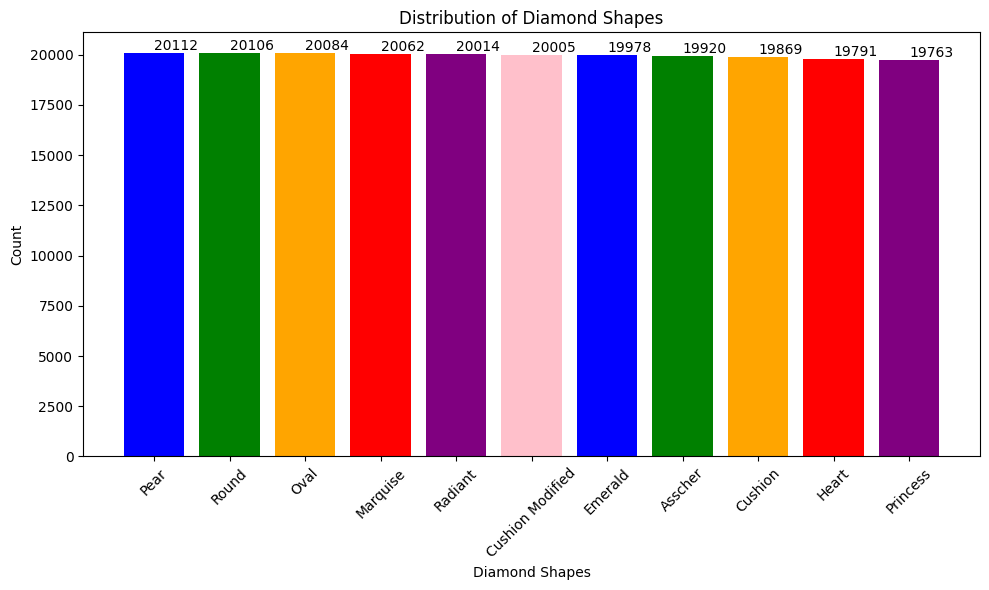

In [9]:
shape_countDF.reset_index(inplace=True)
shape_countDF.columns = ['Shape', 'Count']

# Define custom colors for the bars
colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink']

# Plotting a bar chart with labels and colors
plt.figure(figsize=(10, 6))
bars = plt.bar(shape_countDF['Shape'], shape_countDF['Count'], color=colors)
plt.xlabel('Diamond Shapes')
plt.ylabel('Count')
plt.title('Distribution of Diamond Shapes')
plt.xticks(rotation=45)

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()

#### 2) What is the size distribution

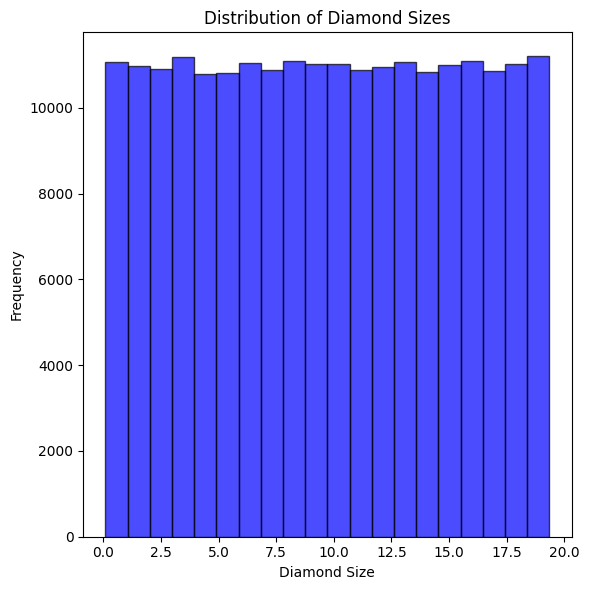

In [10]:
plt.figure(figsize=(6, 6))
plt.hist(dataset['size'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Diamond Size')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Sizes')
plt.tight_layout()
plt.show()

#### 3) What is the count of colors present

In [11]:
color = dataset['color'].value_counts()
colorDF = pd.DataFrame(color)
colorDF

,count
color,
E,22217
K,22090
L,22054
I,21986
M,21971
D,21971
G,21897
J,21886
H,21880


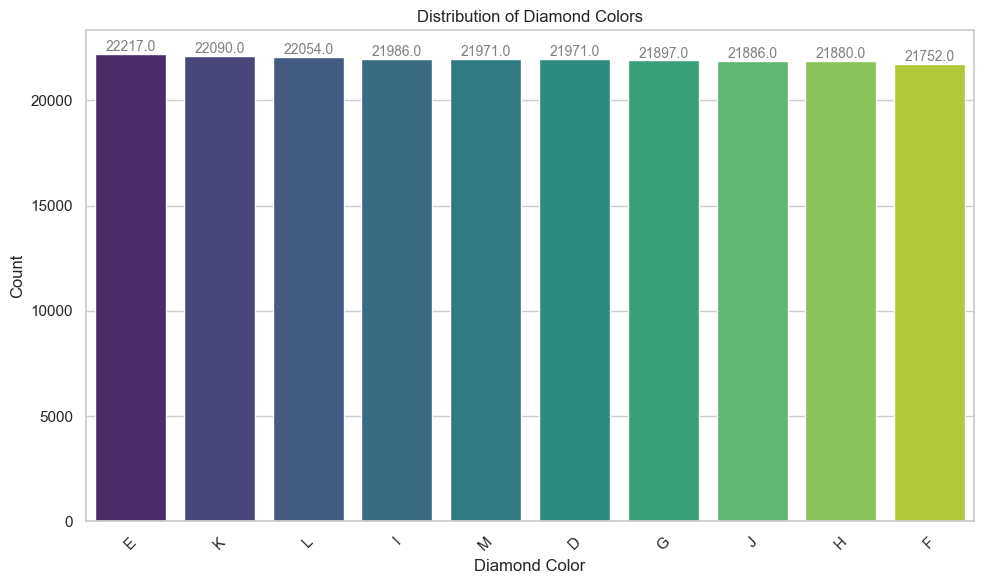

In [12]:
colorDF = pd.DataFrame(color)

# Reset the index to have the color names as a column
colorDF.reset_index(inplace=True)
colorDF.columns = ['Color', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Color', y='Count', data=colorDF, palette="viridis")
plt.xlabel('Diamond Color')
plt.ylabel('Count')
plt.title('Distribution of Diamond Colors')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4) To show fancy color distribution

In [13]:
fcolor_dist = dataset['fancy_color_dominant_color'].value_counts()
fcolor_distDF = pd.DataFrame(fcolor_dist)
fcolor_distDF

,count
fancy_color_dominant_color,
Orange,18513
Green,18509
Other,18445
Brown,18396
Red,18362
Black,18311
Pink,18274
Purple,18254
Yellow,18219


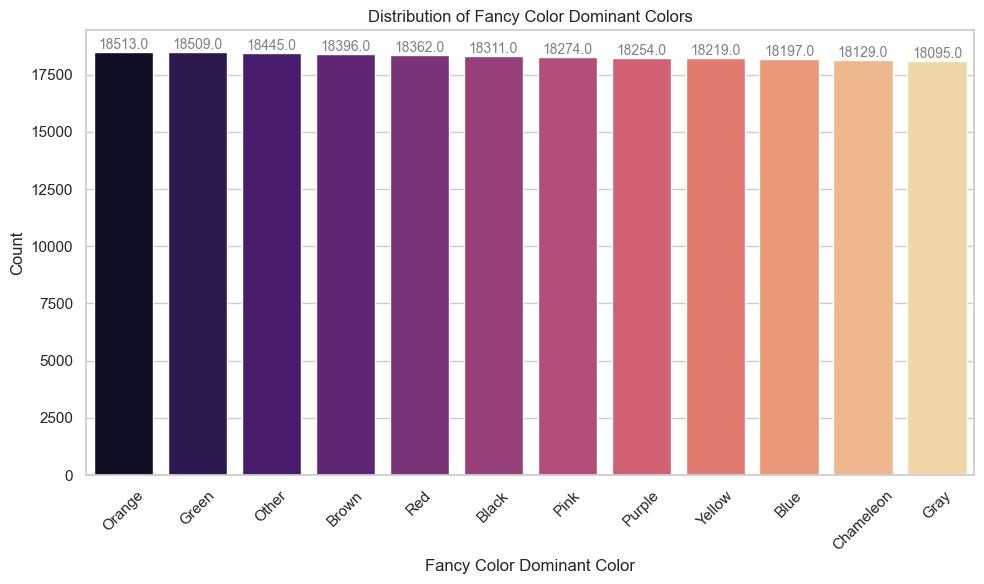

In [14]:
fcolor_distDF = pd.DataFrame(fcolor_dist)

# Reset the index to have the fancy color names as a column
fcolor_distDF.reset_index(inplace=True)
fcolor_distDF.columns = ['Fancy Color', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Fancy Color', y='Count', data=fcolor_distDF, palette="magma")
plt.xlabel('Fancy Color Dominant Color')
plt.ylabel('Count')
plt.title('Distribution of Fancy Color Dominant Colors')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5) To show fancy_color_overtone distribution

In [15]:
overtone = dataset['fancy_color_overtone'].value_counts()
overtoneDF = pd.DataFrame(overtone)
overtoneDF

,count
fancy_color_overtone,
Orangey,31633
Pinkish,31577
Yellowish,31553
Greenish,31441
Grayish,31427
Brownish,31050
Purplish,31023


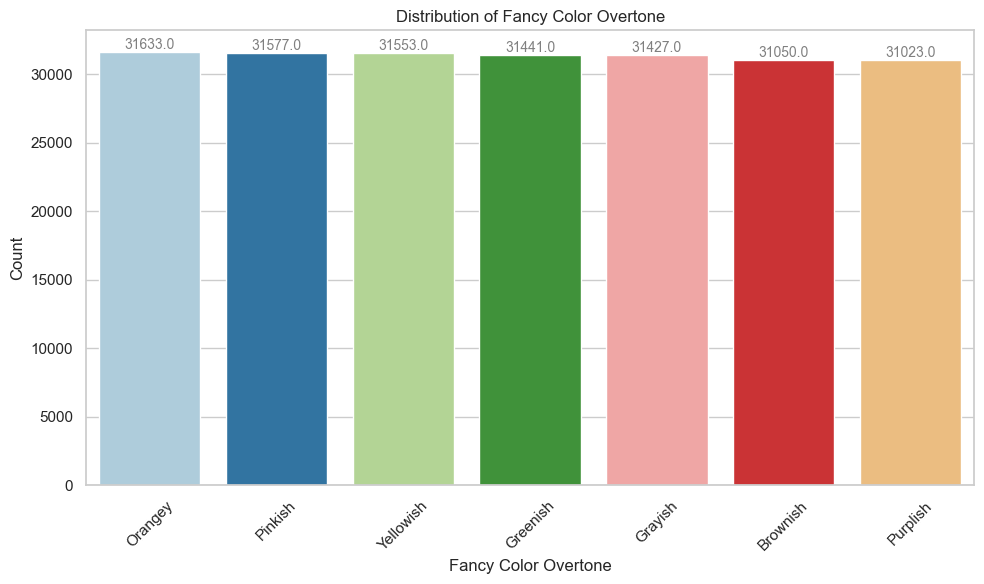

In [16]:
overtoneDF = pd.DataFrame(overtone)

# Reset the index to have the overtone names as a column
overtoneDF.reset_index(inplace=True)
overtoneDF.columns = ['Overtone', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Overtone', y='Count', data=overtoneDF, palette="Paired")
plt.xlabel('Fancy Color Overtone')
plt.ylabel('Count')
plt.title('Distribution of Fancy Color Overtone')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6) To show fancy_color_intensity distribution

In [17]:
intensity = dataset['fancy_color_intensity'].value_counts()
intensityDF = pd.DataFrame(intensity)
intensityDF

,count
fancy_color_intensity,
Fancy Light,24572
Fancy Intense,24564
Light,24549
Fancy Dark,24469
Fancy Vivid,24423
Faint,24382
Very Light,24381
Fancy,24183
Fancy Deep,24181


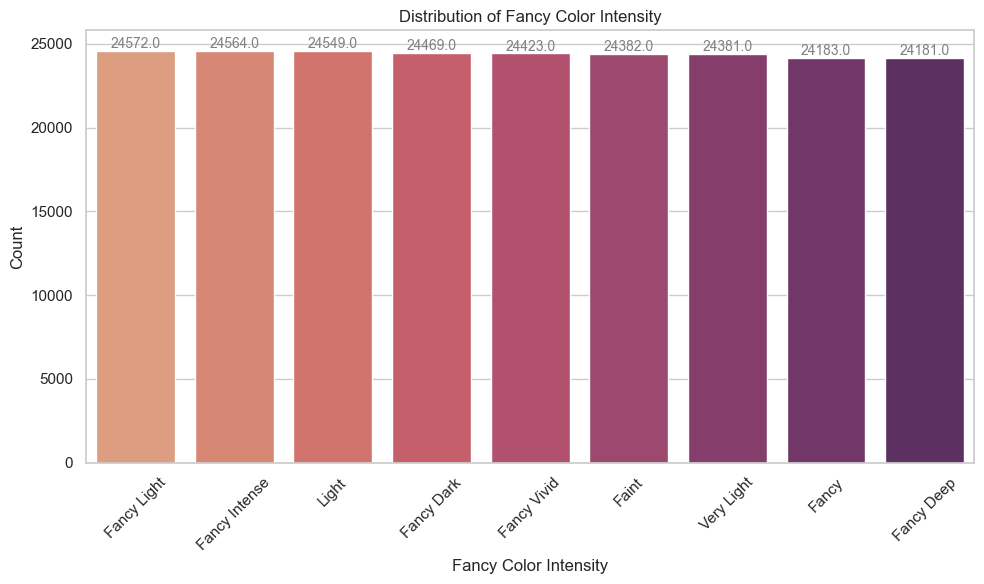

In [18]:
intensityDF = pd.DataFrame(intensity)

# Reset the index to have the intensity levels as a column
intensityDF.reset_index(inplace=True)
intensityDF.columns = ['Intensity', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Intensity', y='Count', data=intensityDF, palette="flare")
plt.xlabel('Fancy Color Intensity')
plt.ylabel('Count')
plt.title('Distribution of Fancy Color Intensity')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 7) TO show clarity distribution

In [19]:
clarity = dataset['clarity'].value_counts()
clarityDF = pd.DataFrame(clarity)
clarityDF

,count
clarity,
VS2,20080
VVS1,20078
IF,20062
VVS2,20013
I2,20012
VS1,19994
SI1,19991
I1,19944
I3,19930


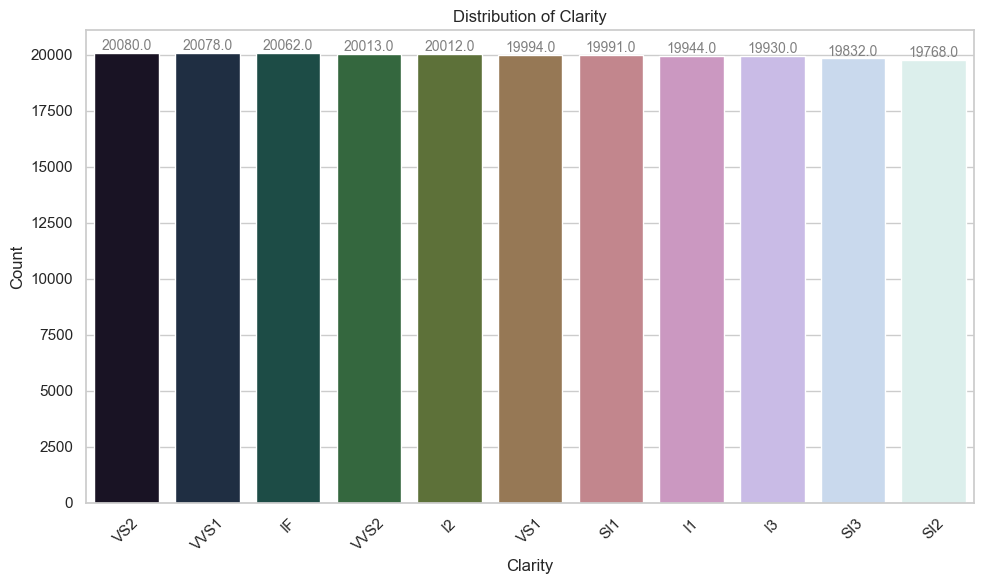

In [20]:
clarityDF = pd.DataFrame(clarity)

# Reset the index to have the intensity levels as a column
clarityDF.reset_index(inplace=True)
clarityDF.columns = ['Clarity', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Clarity', y='Count', data=clarityDF, palette="cubehelix")
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.title('Distribution of Clarity')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8) To show the cut percentages

In [21]:
cut = dataset['cut'].value_counts()
cutDF = pd.DataFrame(cut)
cutDF

,count
cut,
Excellent,44237
Poor,44113
Fair,43866
Good,43753
Very Good,43735


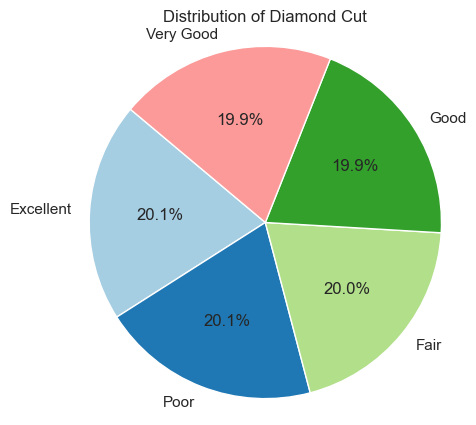

In [22]:
cutDF = pd.DataFrame(cut)

# Reset the index to have the cut categories as a column
cutDF.reset_index(inplace=True)
cutDF.columns = ['Cut', 'Count']

# Plotting a pie chart with percentage labels
plt.figure(figsize=(5, 5))
plt.pie(cutDF['Count'], labels=cutDF['Cut'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Diamond Cut')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 9) To show symmetry distribution

In [23]:
symmetry = dataset['symmetry'].value_counts()
symmetryDF = pd.DataFrame(symmetry)
symmetryDF

,count
symmetry,
Good,44308
Poor,43952
Fair,43886
Very Good,43861
Excellent,43697


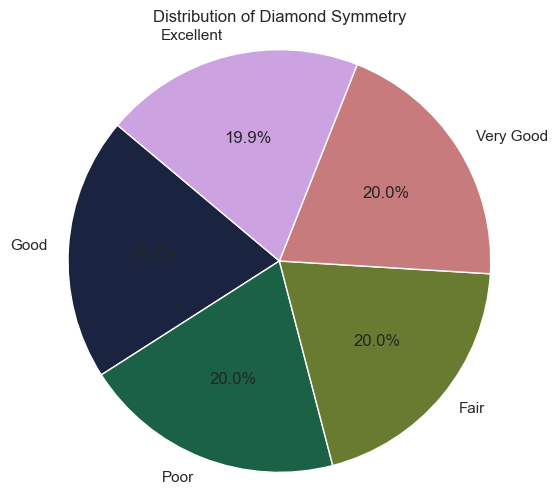

In [24]:
symmetryDF = pd.DataFrame(symmetry)

# Reset the index to have the symmetry categories as a column
symmetryDF.reset_index(inplace=True)
symmetryDF.columns = ['Symmetry', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(symmetryDF['Count'], labels=symmetryDF['Symmetry'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("cubehelix"))
plt.title('Distribution of Diamond Symmetry')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 10) To show polish distribution

In [25]:
polish = dataset['polish'].value_counts()
polishDF = pd.DataFrame(polish)
polishDF

,count
polish,
Fair,44153
Poor,44046
Excellent,43980
Very Good,43883
Good,43642


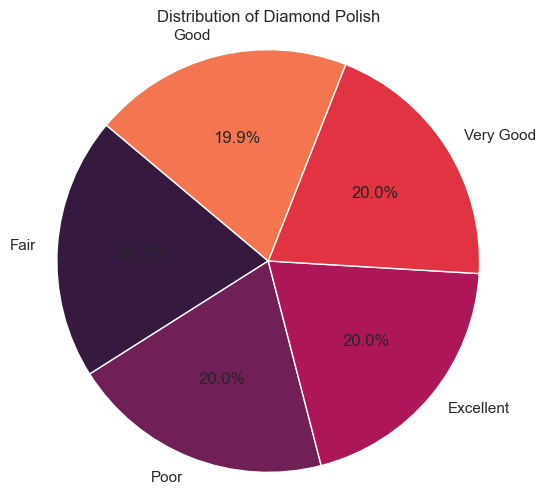

In [26]:
polishDF = pd.DataFrame(polish)

# Reset the index to have the symmetry categories as a column
polishDF.reset_index(inplace=True)
polishDF.columns = ['polish', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(polishDF['Count'], labels=polishDF['polish'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("rocket"))
plt.title('Distribution of Diamond Polish')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 11) To show culet_size distribution

In [27]:
culet = dataset['culet_size'].value_counts()
culetDF = pd.DataFrame(culet)
culetDF

,count
culet_size,
M,27769
VL,27728
EL,27583
L,27483
SL,27369
N,27293
VS,27269
S,27210


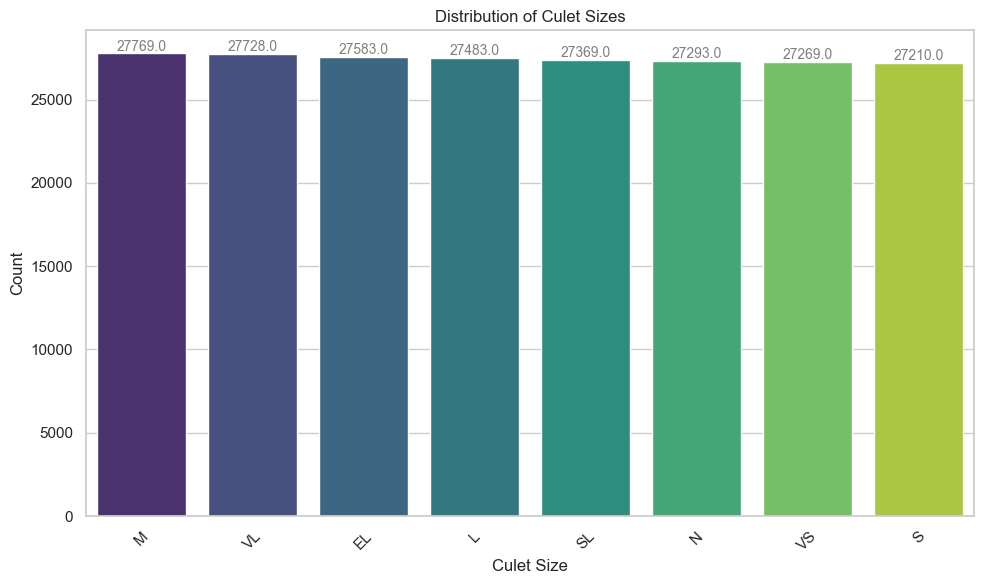

In [28]:
culetDF = pd.DataFrame(culet)

# Reset the index to have the culet sizes as a column
culetDF.reset_index(inplace=True)
culetDF.columns = ['Culet Size', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Culet Size', y='Count', data=culetDF, palette="viridis")
plt.xlabel('Culet Size')
plt.ylabel('Count')
plt.title('Distribution of Culet Sizes')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 12) To show culet_condition distribution

In [29]:
culet = dataset['culet_condition'].value_counts()
culetDF = pd.DataFrame(culet)
culetDF

,count
culet_condition,
White,44071
Orange,43967
Blue,43963
Green,43860
Yellow,43843


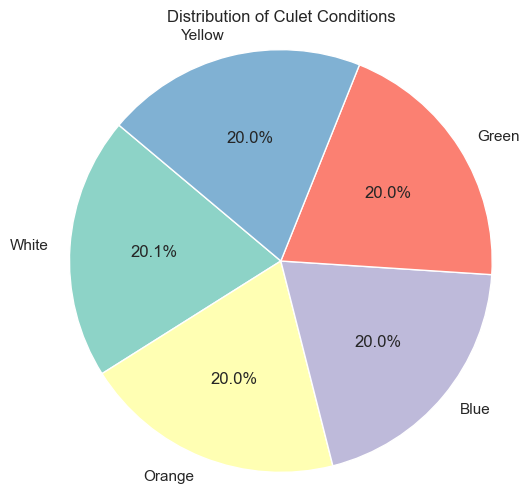

In [30]:
culetDF = pd.DataFrame(culet)

# Reset the index to have the culet conditions as a column
culetDF.reset_index(inplace=True)
culetDF.columns = ['Culet Condition', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(culetDF['Count'], labels=culetDF['Culet Condition'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("Set3"))
plt.title('Distribution of Culet Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 13) To show fluor_intensity distribution

In [31]:
fluor = dataset['fluor_intensity'].value_counts()
fluorDF = pd.DataFrame(fluor)
fluorDF

,count
fluor_intensity,
Very Slight,36781
Very Strong,36766
Slight,36712
Faint,36613
Medium,36465
Strong,36367


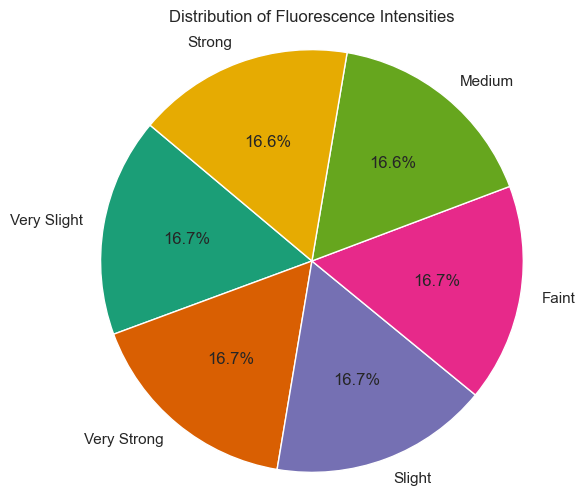

In [32]:
fluorDF = pd.DataFrame(fluor)

# Reset the index to have the fluorescence intensities as a column
fluorDF.reset_index(inplace=True)
fluorDF.columns = ['Fluorescence Intensity', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(fluorDF['Count'], labels=fluorDF['Fluorescence Intensity'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("Dark2"))
plt.title('Distribution of Fluorescence Intensities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 14) To show the count of labs

In [33]:
lab = dataset['lab'].value_counts()
labDF = pd.DataFrame(lab)
labDF

,count
lab,
IGI,73515
HRD,73100
GIA,73089


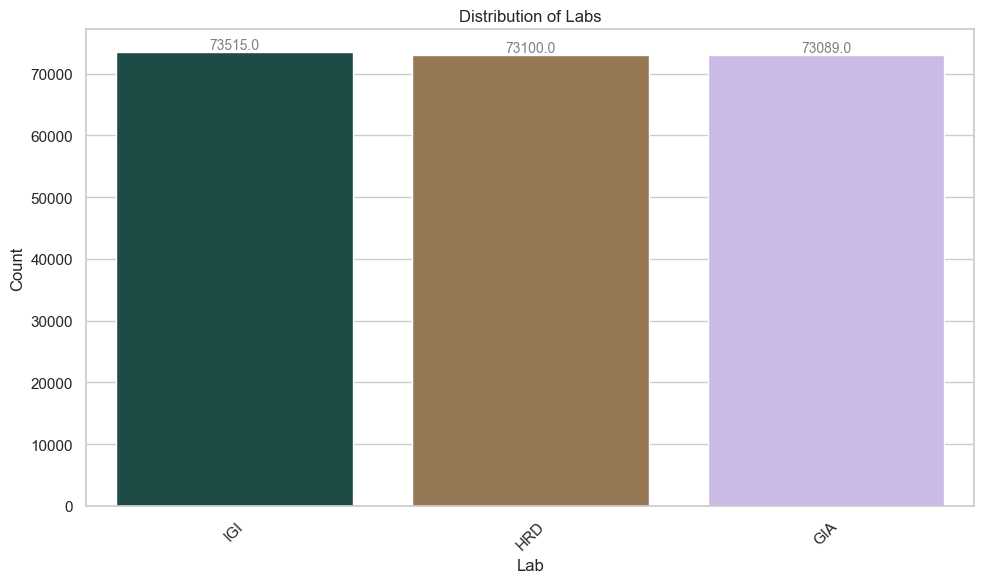

In [34]:
labDF = pd.DataFrame(lab)

# Reset the index to have the lab values as a column
labDF.reset_index(inplace=True)
labDF.columns = ['Lab', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a bar graph using seaborn with bar labels
plt.figure(figsize=(10, 6))
ax = sn.barplot(x='Lab', y='Count', data=labDF, palette="cubehelix")
plt.xlabel('Lab')
plt.ylabel('Count')
plt.title('Distribution of Labs')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 15) To show eye_clean distribution

In [35]:
eye = dataset['eye_clean'].value_counts()
eyeDF = pd.DataFrame(eye)
eyeDF

,count
eye_clean,
E1,55210
No,55050
Borderline,54773
Yes,54671


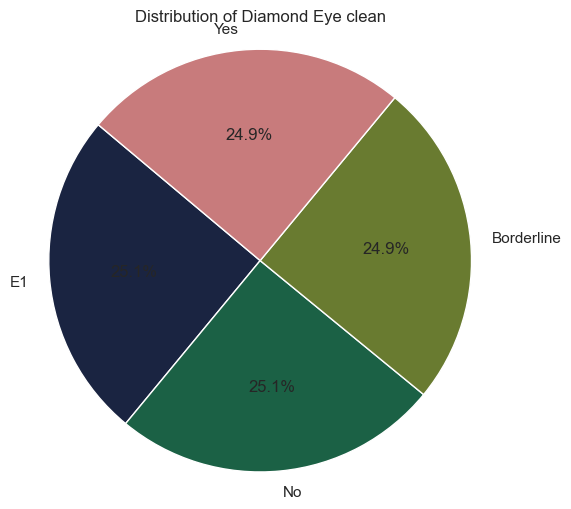

In [36]:
eyeDF = pd.DataFrame(eye)

# Reset the index to have the symmetry categories as a column
eyeDF.reset_index(inplace=True)
eyeDF.columns = ['Eye_Clean', 'Count']

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a pie chart using seaborn with percentage labels
plt.figure(figsize=(6,6))
plt.pie(eyeDF['Count'], labels=eyeDF['Eye_Clean'], autopct='%1.1f%%', startangle=140, colors=sn.color_palette("cubehelix"))
plt.title('Distribution of Diamond Eye clean')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 16) To find the year on year total sales

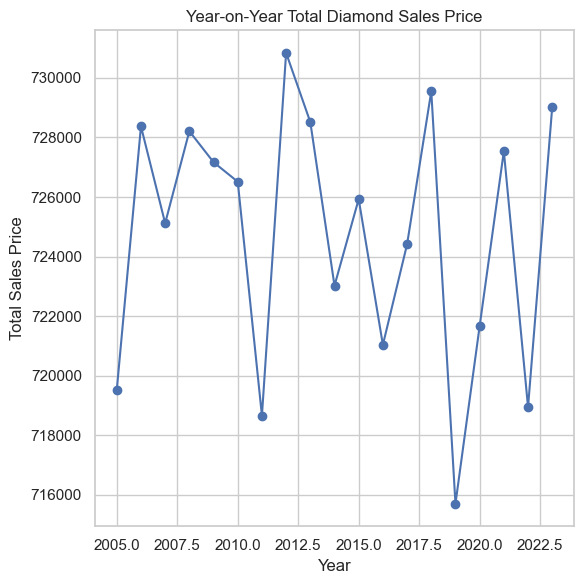

In [37]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['year'] = dataset['date'].dt.year

# Group by year and calculate the total sales price for each year
yearly_sales = dataset.groupby('year')['total_sales_price'].mean()

# Plotting a line graph for year-on-year total sales price
plt.figure(figsize=(6, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales Price')
plt.title('Year-on-Year Total Diamond Sales Price')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 17) To find month on month  total sales

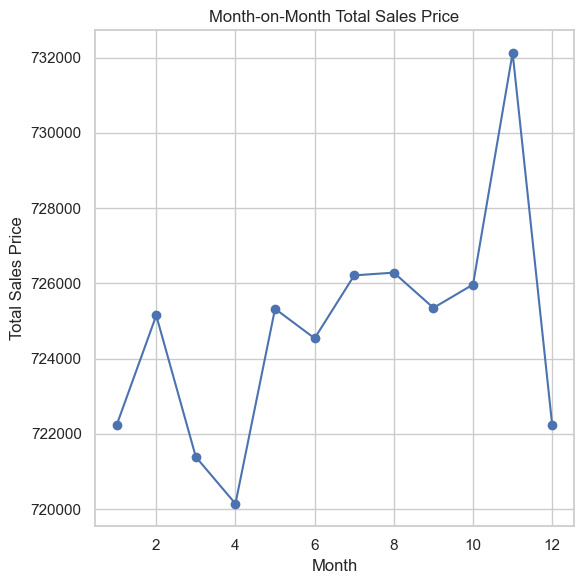

In [38]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['month'] = dataset['date'].dt.month

# Group by year and calculate the total sales price for each year
yearly_sales = dataset.groupby('month')['total_sales_price'].mean()

# Plotting a line graph for year-on-year total sales price
plt.figure(figsize=(6, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Price')
plt.title('Month-on-Month Total Sales Price')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 18) To find count of shapes generated by labs

In [39]:
dataset.groupby('lab')['shape'].value_counts()

lab  shape           
GIA  Marquise            6826
     Radiant             6720
     Oval                6706
     Pear                6688
     Cushion Modified    6684
     Emerald             6663
     Cushion             6641
     Round               6596
     Asscher             6565
     Heart               6550
     Princess            6450
HRD  Round               6735
     Asscher             6695
     Oval                6689
     Pear                6680
     Princess            6664
     Cushion Modified    6646
     Emerald             6640
     Marquise            6628
     Heart               6628
     Radiant             6625
     Cushion             6470
IGI  Round               6775
     Cushion             6758
     Pear                6744
     Oval                6689
     Emerald             6675
     Cushion Modified    6675
     Radiant             6669
     Asscher             6660
     Princess            6649
     Heart               6613
     Marquise     

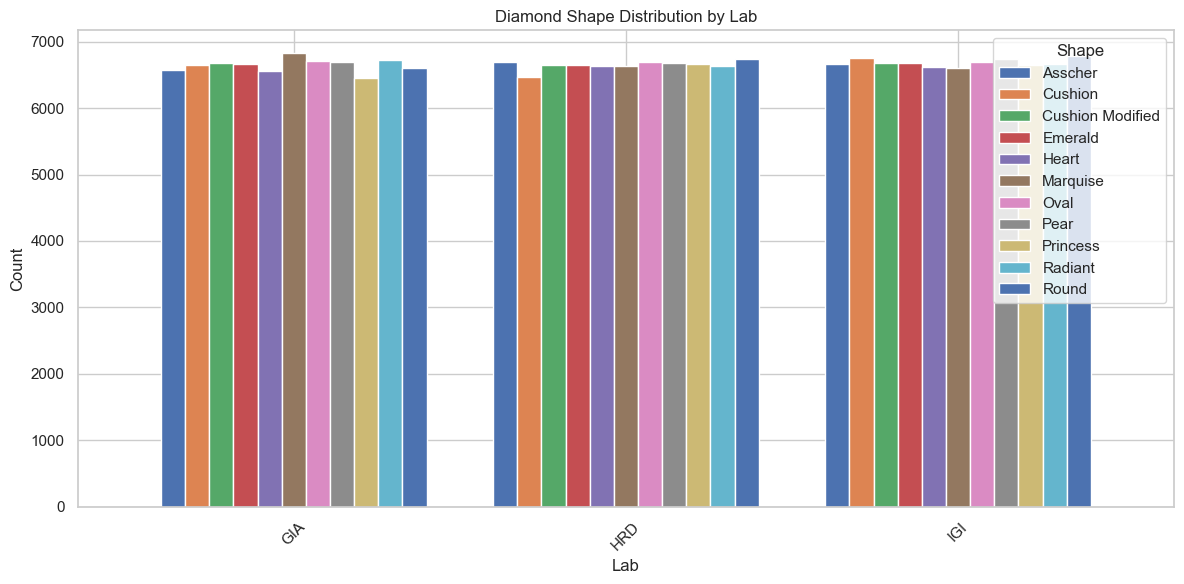

In [40]:
grouped_counts = dataset.groupby(['lab', 'shape']).size().unstack()

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a side-by-side bar chart using seaborn
plt.figure(figsize=(12, 6))
grouped_counts.plot(kind='bar', width=0.8, ax=plt.gca())
plt.xlabel('Lab')
plt.ylabel('Count')
plt.title('Diamond Shape Distribution by Lab')
plt.xticks(rotation=45)
plt.legend(title='Shape')
plt.tight_layout()
plt.show()

#### 19) To find size variations across the years

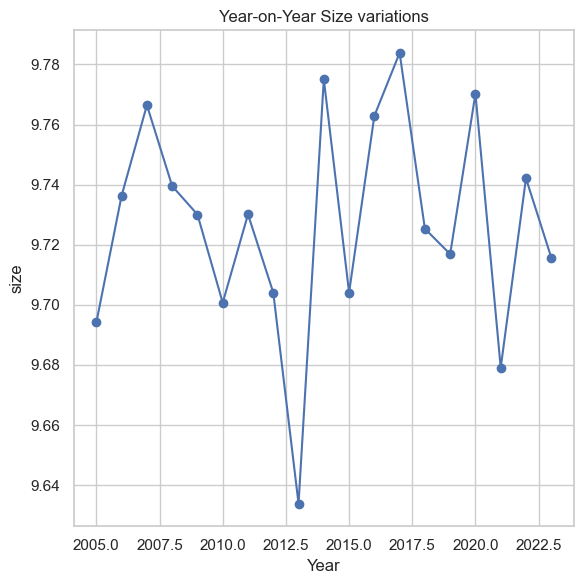

In [41]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['year'] = dataset['date'].dt.year

# Group by year and calculate the total sales price for each year
yearly_size = dataset.groupby('year')['size'].mean()

# Plotting a line graph for year-on-year total sales price
plt.figure(figsize=(6, 6))
plt.plot(yearly_size.index, yearly_size.values, marker='o')
plt.xlabel('Year')
plt.ylabel('size')
plt.title('Year-on-Year Size variations')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 20) To find month on month size variations

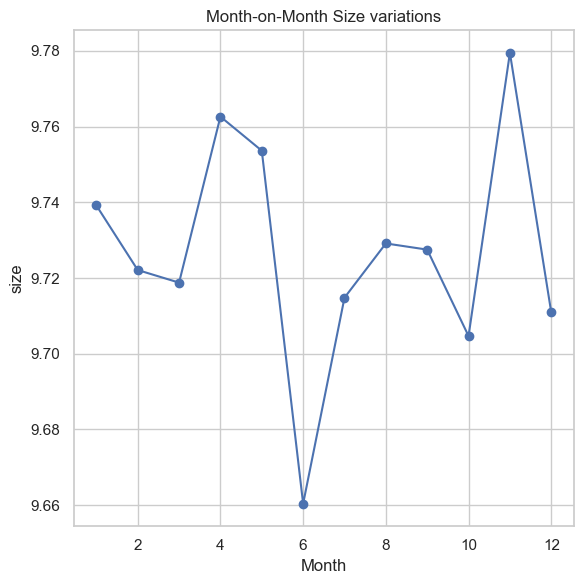

In [42]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['month'] = dataset['date'].dt.month

# Group by year and calculate the total sales price for each year
monthly_size = dataset.groupby('month')['size'].mean()

# Plotting a line graph for year-on-year total sales price
plt.figure(figsize=(6, 6))
plt.plot(monthly_size.index, monthly_size.values, marker='o')
plt.xlabel('Month')
plt.ylabel('size')
plt.title('Month-on-Month Size variations')
plt.grid(True)
plt.tight_layout()
plt.show()



#### 21) To show yearly variations in the cuts that were made

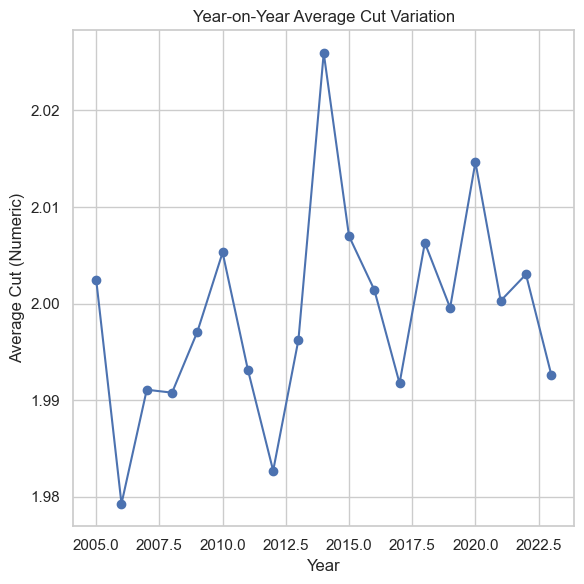

In [43]:
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

# Convert the 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['year'] = dataset['date'].dt.year

# Map cut categories to numerical values
dataset['cut_numeric'] = dataset['cut'].map(cut_mapping)

# Group by year and calculate the average cut
yearly_avg_cut = dataset.groupby('year')['cut_numeric'].mean()

# Plotting a line graph for year-on-year average cut
plt.figure(figsize=(6, 6))
plt.plot(yearly_avg_cut.index, yearly_avg_cut.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Cut (Numeric)')
plt.title('Year-on-Year Average Cut Variation')
plt.grid(True)
plt.tight_layout()
plt.show()

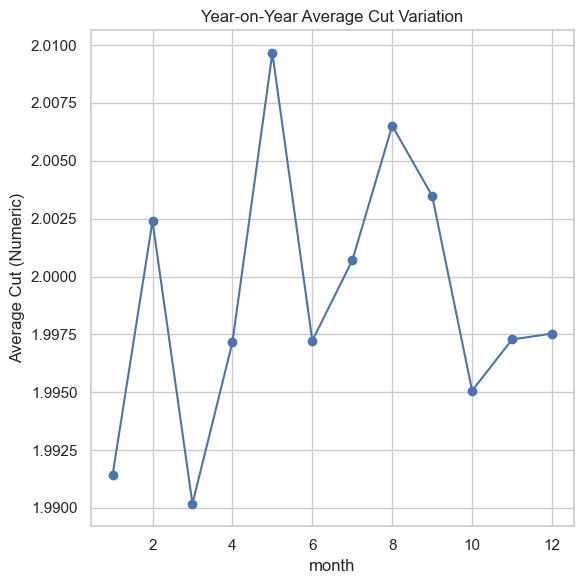

In [44]:
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

# Convert the 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract year from the date
dataset['month'] = dataset['date'].dt.month

# Map cut categories to numerical values
dataset['cut_numeric'] = dataset['cut'].map(cut_mapping)

# Group by year and calculate the average cut
yearly_avg_cut = dataset.groupby('month')['cut_numeric'].mean()

# Plotting a line graph for year-on-year average cut
plt.figure(figsize=(6, 6))
plt.plot(yearly_avg_cut.index, yearly_avg_cut.values, marker='o')
plt.xlabel('month')
plt.ylabel('Average Cut (Numeric)')
plt.title('Year-on-Year Average Cut Variation')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 22) To show the relation between culet_size and cut taken

In [45]:
cross_tab = pd.crosstab(dataset['culet_size'], dataset['cut'])

# Display the cross-tabulation table
cross_tabDF = pd.DataFrame(cross_tab)
cross_tabDF

cut,Excellent,Fair,Good,Poor,Very Good
culet_size,,,,,
EL,5674,5430,5384,5599,5496
L,5443,5525,5469,5473,5573
M,5585,5646,5583,5496,5459
N,5447,5402,5525,5388,5531
S,5555,5510,5399,5448,5298
SL,5456,5362,5403,5698,5450
VL,5663,5529,5567,5548,5421
VS,5414,5462,5423,5463,5507


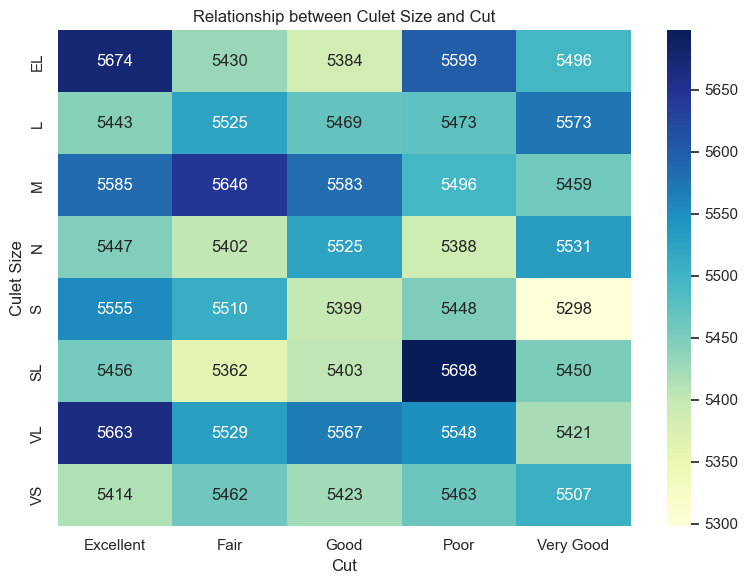

In [46]:
cross_tab = pd.crosstab(dataset['culet_size'], dataset['cut'])

# Set the style of seaborn
sn.set(style="whitegrid")

# Plotting a heatmap using seaborn
plt.figure(figsize=(8, 6))
sn.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Cut')
plt.ylabel('Culet Size')
plt.title('Relationship between Culet Size and Cut')
plt.tight_layout()
plt.show()